# Decision Tree Exercises

In [ ]:
!pip install graphviz==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 7.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree as tr
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading Data

Load Pima Diabetes dataset and split data using test size of 20% per split.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names=names)

In [ ]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Creating Model

Make a model using sklearn's `DecisionTreeClassifier`. Set the parameters to a high maximum depth and a low minimum samples leaf.

In [ ]:
## YOUR CODE HERE
tree = DecisionTreeClassifier(max_depth = 30, min_samples_leaf = 3)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=3)

In [ ]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(train_acc, test_acc)

0.9332247557003257 0.7467532467532467


Make a model with a low maximum depth and a higher minimum samples leaf. Feel free to play around with these parameters.

In [ ]:
## YOUR CODE HERE
tree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 20)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [ ]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(train_acc, test_acc)

0.8175895765472313 0.7792207792207793


Explain the accuracy results below.

> Answer: A lesser depth and higher minimum leaf samples value reduces overfitting by ensuring the tree is unable to perfectly fit the data by creating massive trees with extremely specific branches.

## Metrics

Plot the ROC curve and print the AUC of the second model.

In [ ]:
## YOUR CODE HERE
y_test_prob = tree.predict_proba(X_test, [0, 1])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])

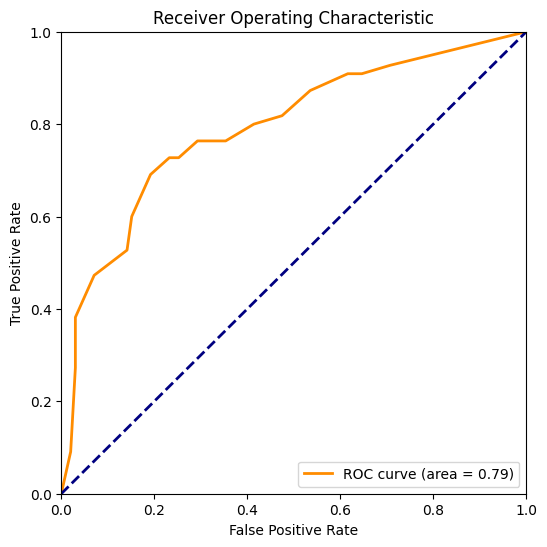

In [ ]:
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Use Graphviz to visualize your second tree.

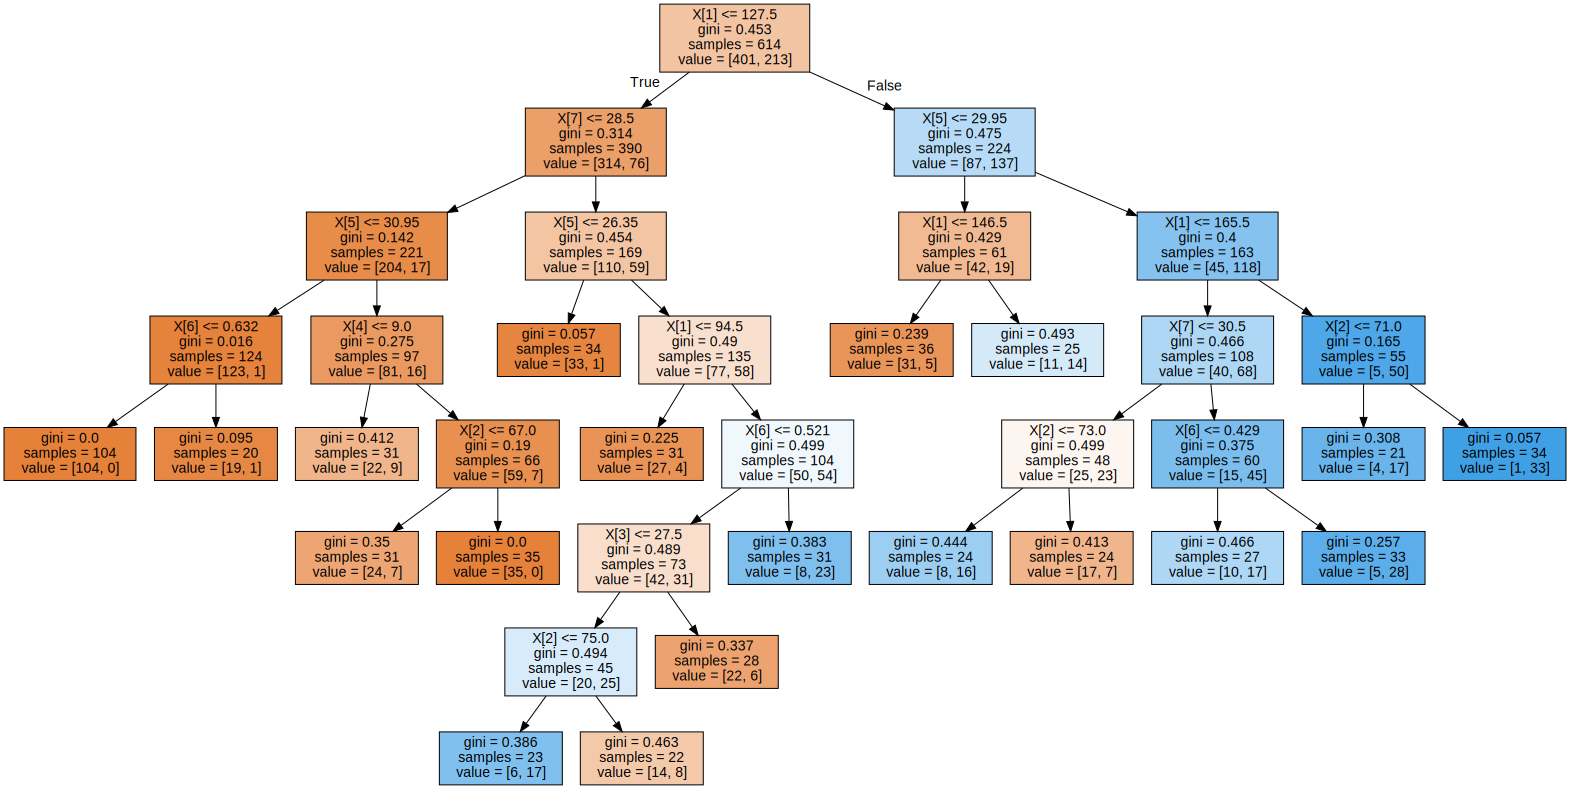

In [ ]:
## YOUR CODE HERE
dot_data = tr.export_graphviz(tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think $X[n]$ represents in the nodes from the graph?

> Answer: X[n] represents the nth feature from the data. The the branches are created to separate different values of X[n]. 

Question 2: What is the root feature? Does it make sense as the root feature?

> Answer: The root feature is blood plasma glucose, which makes sense because diabetes has a direct effect on glucose levels as a result of improper insulin handling.

Question 3: If you were to change the parameters to have a `max_depth` of 500 and `min_samples_leaf` of 1, what do you think the effect would be on the testing accuracy? Training accuracy?

> Answer: The training accuracy would likely reach 100, and the testing accuracy would be substantially lower. There are only around 500 training data entries, which means a model that deep with minimum leaf samples as 1 could just create branches that memorize each individual training entry and massively overfit.

**Test your guesses**: Create a model with `max_depth`=500 and `min_samples_leaf`=1, and predict values for the training and validation data.

In [ ]:
## YOUR CODE HERE
terrible_tree = DecisionTreeClassifier(max_depth = 500, min_samples_leaf = 1)

terrible_tree.fit(X_train, y_train)

y_train_pred = terrible_tree.predict(X_train)
y_test_pred = terrible_tree.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(train_acc, test_acc)

1.0 0.7532467532467533


# Random Forest

## Creating Model

Create a model with sklearn's `RandomForestClassifier` and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
forest = RandomForestClassifier(max_depth=30, min_samples_leaf = 20)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=20)

Print accuracy of training and validation data.

In [1]:
## YOUR CODE HERE
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(train_acc, test_acc)

NameError: name 'forest' is not defined

How did the accuracy compare to the decision tree's accuracy?

> Answer: It performed worse.

Print the 3 most important features (hint: sklearn has an attribute to help you find these).

In [ ]:
## YOUR CODE HERE
importances = forest.feature_importances_

top_indices = np.argsort(importances)[::-1][:3]

for index in top_indices:
    print(index, X_cols[index])

1 plas
7 age
5 mass


Find the accuracies for random forests with 1 to 100 trees, counting by 5. Plot these accuracies.

In [ ]:
## YOUR CODE HERE
tree_num = list(range(1, 101, 5))
forest_train_accuracies = []
forest_test_accuracies = []

for i in tree_num:
    forest = RandomForestClassifier(n_estimators = i, max_depth = 5, min_samples_leaf = 20)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    forest_train_accuracies.append(accuracy_score(y_train, y_train_pred))
    forest_test_accuracies.append(accuracy_score(y_test, y_test_pred))

print(forest_test_accuracies)

[0.7207792207792207, 0.7662337662337663, 0.7857142857142857, 0.7662337662337663, 0.7597402597402597, 0.7662337662337663, 0.7337662337662337, 0.7662337662337663, 0.7662337662337663, 0.7532467532467533, 0.7402597402597403, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7597402597402597, 0.7792207792207793, 0.7792207792207793, 0.7792207792207793, 0.7662337662337663, 0.7467532467532467]


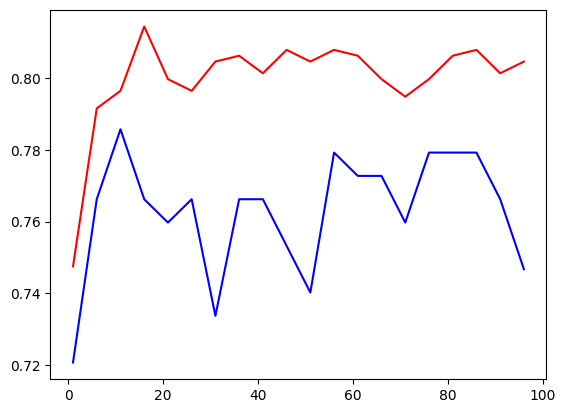

In [ ]:
plt.plot(tree_num, forest_train_accuracies, 'r', tree_num, forest_test_accuracies, 'b')
plt.show()

Plot the ROC curve using the `predict_proba()` function for our random forest model and `metrics.roc_curve()`.

It will help to look up these functions and read sklearn's documentation.

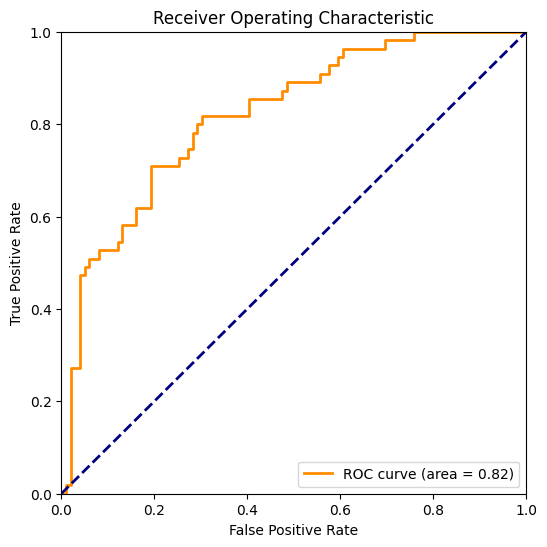

In [ ]:
## YOUR CODE HERE
y_test_prob = forest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Extra
If you have time, try to view the trees in your random forest by looping through the model's `estimators_` attribute (hint: first reduce the number of estimators in your tree for better visualization).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d32e568-365c-48d5-a586-2fcf756ec4ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>